<a href="https://colab.research.google.com/github/Chanura04/ML-Coursework/blob/main/20240955.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    confusion_matrix
)

from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks, models

SEED = 42
tf.random.set_seed(SEED)

## Load the dataset

In [3]:
url_x = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/processed/set_02/X.csv"
url_y = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/processed/set_02/y_data.csv"

## Check dataset behaviour

In [4]:
X=pd.read_csv(url_x)
y=pd.read_csv(url_y)
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,-1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,-1,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [5]:
X.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [6]:
X.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharge', 'IsNewCustomer',
       'IsHighCharge', 'Monthly_Tenure_Ratio', 'Total_Monthly_Ratio',
       'TotalServices', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [7]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [8]:
X.shape

(7043, 31)

In [9]:
y.shape

(7043, 1)

In [10]:
cols=[ 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

if set(cols) == set(X.columns):
    print("All columns are present.")
else:
    missing = set(cols) - set(X.columns)
    extra = set(X.columns) - set(cols)
    if missing:
        print("Missing columns:", missing)
    if extra:
        print("Extra columns:", extra)

Extra columns: {'Monthly_Tenure_Ratio', 'TotalServices', 'IsHighCharge', 'IsNewCustomer', 'InternetService_DSL', 'Contract_Month-to-month', 'PaymentMethod_Bank transfer (automatic)', 'Total_Monthly_Ratio', 'AvgMonthlyCharge'}


### Split Data into Training, Validation, and Test Sets

In [ ]:
X_train, X_temp, y_train, y_temp= train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test= train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (4930, 31)
Shape of y_train: (4930, 1)
Shape of X_val: (1056, 31)
Shape of y_val: (1056, 1)
Shape of X_test: (1057, 31)
Shape of y_test: (1057, 1)


In [12]:
np.sum(y_val==1)

c:\Users\chanu\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Churn    280
dtype: int64

In [13]:
np.sum(y_val==0)

Churn    776
dtype: int64

Text(0.5, 1.0, 'Count Plot for Churn')

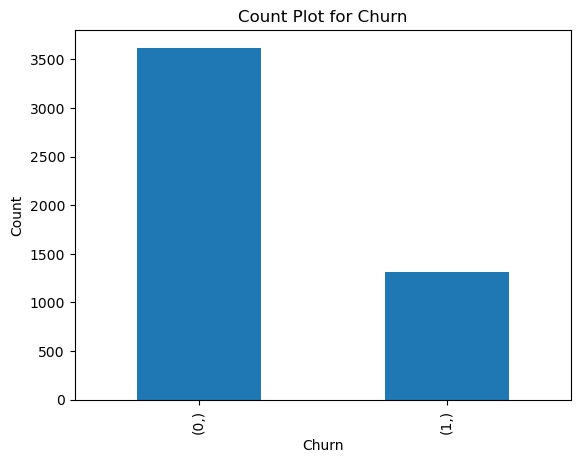

In [14]:
count=y_train.value_counts()
count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')

In [15]:
count

Churn
0        3622
1        1308
Name: count, dtype: int64

In [16]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [17]:
# Initialize the scaler
scaler = StandardScaler()

# FIT AND TRANSFORM the training data 
X_train = scaler.fit_transform(X_train)

# TRANSFORM the test data 
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [18]:
X_train[0]

array([-0.39109131, -0.77060975, -0.52110117, -0.94250403,  0.34837082,
       -0.50108962, -0.07479998, -0.17569358, -0.18308671, -0.0895356 ,
        1.14472172, -0.28855596, -1.22566115,  0.41798947, -0.75830854,
        0.12149001,  1.62825357,  1.21898728,  0.54178534, -0.95053317,
       -0.32276107, -0.64043858,  0.97464491, -0.43732304,  0.75228431,
       -0.41789856, -0.44736175, -0.43418334, -0.42426023,  1.36708116,
       -0.46853881])

In [19]:
y_train = y_train.squeeze()    
y_val   = y_val.squeeze()
y_test  = y_test.squeeze()

Text(0.5, 1.0, 'Count Plot for Churn')

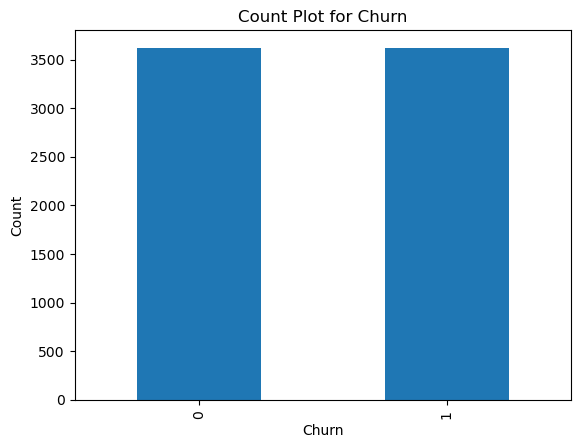

In [20]:
count=y_train.value_counts()
count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')

In [21]:
count

Churn
0    3622
1    3622
Name: count, dtype: int64

Text(0.5, 1.0, 'Count Plot for Churn')

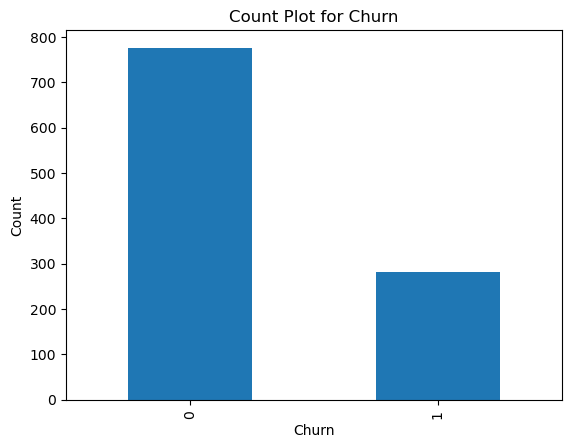

In [22]:
count=y_test.value_counts()
count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')

In [23]:
def plot_history(history):
    # Loss
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Binary Crossentropy")
    plt.legend()


    # Accuracy
    plt.subplot(1,3,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Accuracy Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()


    # AUC
    plt.subplot(1,3,3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title("AUC Curve")
    plt.xlabel("Epochs")
    plt.ylabel("AUC Score")
    plt.legend()
    plt.show()





## Train Neural Network

#### Experiment 01

In [24]:
input_dim=X_train.shape[1]
input_dim

31

In [27]:

print("Final shape:", X_train.shape)

Final shape: (7244, 31)


In [28]:
len(X.columns)

31

In [ ]:

set_seed=42
os.environ['PYTHONHASHSEED'] = str(set_seed)

def create_final_model(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),

        
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),

        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.2),
        
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Build model
input_dim = X_train.shape[1] 
model = create_final_model(input_dim)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# Callbacks
callbacks_list = [
    callbacks.EarlyStopping(monitor='val_auc', patience=15, restore_best_weights=True, mode='max'),
    callbacks.ReduceLROnPlateau(monitor='val_auc', factor=0.5, patience=8, min_lr=1e-7),
    callbacks.ModelCheckpoint('best_churn_model_2_2.h5', monitor='val_auc', save_best_only=True, mode='max')
]

# Class weights (important! churn is imbalanced)
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weight_dict)

# TRAIN
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=1024,
    callbacks=callbacks_list,
    class_weight=class_weight_dict,
    verbose=2
)

Class weights: {0: np.float64(1.0), 1: np.float64(1.0)}
Epoch 1/200


8/8 - 2s - 249ms/step - accuracy: 0.4758 - auc: 0.4645 - loss: 0.8530 - precision: 0.4774 - recall: 0.5097 - val_accuracy: 0.3352 - val_auc: 0.4584 - val_loss: 0.7672 - val_precision: 0.2591 - val_recall: 0.8107 - learning_rate: 0.0010
Epoch 2/200


8/8 - 0s - 14ms/step - accuracy: 0.5849 - auc: 0.6218 - loss: 0.6980 - precision: 0.5794 - recall: 0.6198 - val_accuracy: 0.5256 - val_auc: 0.6891 - val_loss: 0.6958 - val_precision: 0.3363 - val_recall: 0.8107 - learning_rate: 0.0010
Epoch 3/200


8/8 - 0s - 14ms/step - accuracy: 0.6586 - auc: 0.7141 - loss: 0.6301 - precision: 0.6564 - recall: 0.6657 - val_accuracy: 0.6875 - val_auc: 0.7721 - val_loss: 0.6412 - val_precision: 0.4496 - val_recall: 0.7964 - learning_rate: 0.0010
Epoch 4/200


8/8 - 0s - 15ms/step - accuracy: 0.7031 - auc: 0.7685 - loss: 0.5824 - precision: 0.7089 - recall: 0.6891 - val_accuracy: 0.7367 - val_auc: 0.7991 - val_loss: 0.5998 - val_precision: 0.5023 - val_recall: 0.7857 - learning_rate: 0.0010
Epoch 5/200


8/8 - 0s - 15ms/step - accuracy: 0.7289 - auc: 0.7962 - loss: 0.5517 - precision: 0.7382 - recall: 0.7093 - val_accuracy: 0.7415 - val_auc: 0.8123 - val_loss: 0.5678 - val_precision: 0.5085 - val_recall: 0.7500 - learning_rate: 0.0010
Epoch 6/200


8/8 - 0s - 13ms/step - accuracy: 0.7471 - auc: 0.8155 - loss: 0.5331 - precision: 0.7551 - recall: 0.7314 - val_accuracy: 0.7509 - val_auc: 0.8190 - val_loss: 0.5441 - val_precision: 0.5212 - val_recall: 0.7464 - learning_rate: 0.0010
Epoch 7/200


8/8 - 0s - 13ms/step - accuracy: 0.7586 - auc: 0.8344 - loss: 0.5092 - precision: 0.7669 - recall: 0.7430 - val_accuracy: 0.7557 - val_auc: 0.8231 - val_loss: 0.5245 - val_precision: 0.5279 - val_recall: 0.7429 - learning_rate: 0.0010
Epoch 8/200


8/8 - 0s - 13ms/step - accuracy: 0.7644 - auc: 0.8432 - loss: 0.4934 - precision: 0.7719 - recall: 0.7504 - val_accuracy: 0.7604 - val_auc: 0.8261 - val_loss: 0.5092 - val_precision: 0.5347 - val_recall: 0.7429 - learning_rate: 0.0010
Epoch 9/200


8/8 - 0s - 13ms/step - accuracy: 0.7743 - auc: 0.8489 - loss: 0.4887 - precision: 0.7782 - recall: 0.7673 - val_accuracy: 0.7576 - val_auc: 0.8287 - val_loss: 0.4970 - val_precision: 0.5309 - val_recall: 0.7357 - learning_rate: 0.0010
Epoch 10/200


8/8 - 0s - 13ms/step - accuracy: 0.7766 - auc: 0.8582 - loss: 0.4721 - precision: 0.7793 - recall: 0.7719 - val_accuracy: 0.7604 - val_auc: 0.8301 - val_loss: 0.4883 - val_precision: 0.5352 - val_recall: 0.7321 - learning_rate: 0.0010
Epoch 11/200


8/8 - 0s - 13ms/step - accuracy: 0.7893 - auc: 0.8657 - loss: 0.4643 - precision: 0.7914 - recall: 0.7858 - val_accuracy: 0.7623 - val_auc: 0.8313 - val_loss: 0.4812 - val_precision: 0.5381 - val_recall: 0.7321 - learning_rate: 0.0010
Epoch 12/200


8/8 - 0s - 13ms/step - accuracy: 0.7933 - auc: 0.8707 - loss: 0.4553 - precision: 0.7952 - recall: 0.7902 - val_accuracy: 0.7633 - val_auc: 0.8320 - val_loss: 0.4766 - val_precision: 0.5395 - val_recall: 0.7321 - learning_rate: 0.0010
Epoch 13/200


8/8 - 0s - 14ms/step - accuracy: 0.8034 - auc: 0.8783 - loss: 0.4419 - precision: 0.8009 - recall: 0.8076 - val_accuracy: 0.7642 - val_auc: 0.8329 - val_loss: 0.4729 - val_precision: 0.5411 - val_recall: 0.7286 - learning_rate: 0.0010
Epoch 14/200


8/8 - 0s - 14ms/step - accuracy: 0.8051 - auc: 0.8811 - loss: 0.4381 - precision: 0.8031 - recall: 0.8084 - val_accuracy: 0.7670 - val_auc: 0.8337 - val_loss: 0.4691 - val_precision: 0.5459 - val_recall: 0.7214 - learning_rate: 0.0010
Epoch 15/200


8/8 - 0s - 13ms/step - accuracy: 0.8088 - auc: 0.8830 - loss: 0.4327 - precision: 0.8070 - recall: 0.8117 - val_accuracy: 0.7708 - val_auc: 0.8345 - val_loss: 0.4653 - val_precision: 0.5522 - val_recall: 0.7179 - learning_rate: 0.0010
Epoch 16/200


8/8 - 0s - 14ms/step - accuracy: 0.8076 - auc: 0.8854 - loss: 0.4305 - precision: 0.8034 - recall: 0.8145 - val_accuracy: 0.7746 - val_auc: 0.8353 - val_loss: 0.4618 - val_precision: 0.5587 - val_recall: 0.7143 - learning_rate: 0.0010
Epoch 17/200
8/8 - 0s - 11ms/step - accuracy: 0.8163 - auc: 0.8896 - loss: 0.4243 - precision: 0.8120 - recall: 0.8230 - val_accuracy: 0.7822 - val_auc: 0.8351 - val_loss: 0.4584 - val_precision: 0.5714 - val_recall: 0.7143 - learning_rate: 0.0010
Epoch 18/200


8/8 - 0s - 13ms/step - accuracy: 0.8160 - auc: 0.8921 - loss: 0.4194 - precision: 0.8156 - recall: 0.8167 - val_accuracy: 0.7831 - val_auc: 0.8354 - val_loss: 0.4570 - val_precision: 0.5739 - val_recall: 0.7071 - learning_rate: 0.0010
Epoch 19/200


8/8 - 0s - 13ms/step - accuracy: 0.8219 - auc: 0.8950 - loss: 0.4119 - precision: 0.8195 - recall: 0.8258 - val_accuracy: 0.7860 - val_auc: 0.8363 - val_loss: 0.4547 - val_precision: 0.5789 - val_recall: 0.7071 - learning_rate: 0.0010
Epoch 20/200


8/8 - 0s - 22ms/step - accuracy: 0.8196 - auc: 0.8983 - loss: 0.4069 - precision: 0.8172 - recall: 0.8233 - val_accuracy: 0.7869 - val_auc: 0.8373 - val_loss: 0.4524 - val_precision: 0.5811 - val_recall: 0.7036 - learning_rate: 0.0010
Epoch 21/200


8/8 - 0s - 13ms/step - accuracy: 0.8227 - auc: 0.8965 - loss: 0.4111 - precision: 0.8229 - recall: 0.8225 - val_accuracy: 0.7898 - val_auc: 0.8382 - val_loss: 0.4500 - val_precision: 0.5873 - val_recall: 0.6964 - learning_rate: 0.0010
Epoch 22/200


8/8 - 0s - 14ms/step - accuracy: 0.8232 - auc: 0.8996 - loss: 0.4028 - precision: 0.8211 - recall: 0.8263 - val_accuracy: 0.7850 - val_auc: 0.8386 - val_loss: 0.4481 - val_precision: 0.5826 - val_recall: 0.6679 - learning_rate: 0.0010
Epoch 23/200


8/8 - 0s - 17ms/step - accuracy: 0.8199 - auc: 0.9042 - loss: 0.3940 - precision: 0.8177 - recall: 0.8233 - val_accuracy: 0.7869 - val_auc: 0.8392 - val_loss: 0.4456 - val_precision: 0.5884 - val_recall: 0.6536 - learning_rate: 0.0010
Epoch 24/200


8/8 - 0s - 15ms/step - accuracy: 0.8219 - auc: 0.9039 - loss: 0.3949 - precision: 0.8266 - recall: 0.8147 - val_accuracy: 0.7860 - val_auc: 0.8403 - val_loss: 0.4433 - val_precision: 0.5882 - val_recall: 0.6429 - learning_rate: 0.0010
Epoch 25/200


8/8 - 0s - 15ms/step - accuracy: 0.8313 - auc: 0.9087 - loss: 0.3848 - precision: 0.8344 - recall: 0.8266 - val_accuracy: 0.7917 - val_auc: 0.8405 - val_loss: 0.4419 - val_precision: 0.5980 - val_recall: 0.6536 - learning_rate: 0.0010
Epoch 26/200


8/8 - 0s - 13ms/step - accuracy: 0.8243 - auc: 0.9058 - loss: 0.3914 - precision: 0.8298 - recall: 0.8158 - val_accuracy: 0.7926 - val_auc: 0.8407 - val_loss: 0.4409 - val_precision: 0.6013 - val_recall: 0.6464 - learning_rate: 0.0010
Epoch 27/200


8/8 - 0s - 13ms/step - accuracy: 0.8290 - auc: 0.9080 - loss: 0.3860 - precision: 0.8346 - recall: 0.8205 - val_accuracy: 0.7955 - val_auc: 0.8414 - val_loss: 0.4395 - val_precision: 0.6096 - val_recall: 0.6357 - learning_rate: 0.0010
Epoch 28/200
8/8 - 0s - 12ms/step - accuracy: 0.8301 - auc: 0.9089 - loss: 0.3870 - precision: 0.8365 - recall: 0.8205 - val_accuracy: 0.7907 - val_auc: 0.8414 - val_loss: 0.4385 - val_precision: 0.6050 - val_recall: 0.6071 - learning_rate: 0.0010
Epoch 29/200


8/8 - 0s - 14ms/step - accuracy: 0.8323 - auc: 0.9114 - loss: 0.3805 - precision: 0.8391 - recall: 0.8222 - val_accuracy: 0.7936 - val_auc: 0.8417 - val_loss: 0.4375 - val_precision: 0.6115 - val_recall: 0.6071 - learning_rate: 0.0010
Epoch 30/200


8/8 - 0s - 13ms/step - accuracy: 0.8258 - auc: 0.9100 - loss: 0.3812 - precision: 0.8366 - recall: 0.8098 - val_accuracy: 0.7907 - val_auc: 0.8420 - val_loss: 0.4369 - val_precision: 0.6081 - val_recall: 0.5929 - learning_rate: 0.0010
Epoch 31/200


8/8 - 0s - 14ms/step - accuracy: 0.8334 - auc: 0.9129 - loss: 0.3765 - precision: 0.8416 - recall: 0.8214 - val_accuracy: 0.7888 - val_auc: 0.8426 - val_loss: 0.4358 - val_precision: 0.6044 - val_recall: 0.5893 - learning_rate: 0.0010
Epoch 32/200


8/8 - 0s - 15ms/step - accuracy: 0.8272 - auc: 0.9127 - loss: 0.3749 - precision: 0.8353 - recall: 0.8150 - val_accuracy: 0.7945 - val_auc: 0.8428 - val_loss: 0.4349 - val_precision: 0.6154 - val_recall: 0.6000 - learning_rate: 0.0010
Epoch 33/200


8/8 - 0s - 24ms/step - accuracy: 0.8324 - auc: 0.9163 - loss: 0.3668 - precision: 0.8454 - recall: 0.8136 - val_accuracy: 0.7926 - val_auc: 0.8432 - val_loss: 0.4342 - val_precision: 0.6142 - val_recall: 0.5857 - learning_rate: 0.0010
Epoch 34/200
8/8 - 0s - 11ms/step - accuracy: 0.8331 - auc: 0.9144 - loss: 0.3716 - precision: 0.8474 - recall: 0.8125 - val_accuracy: 0.7917 - val_auc: 0.8432 - val_loss: 0.4341 - val_precision: 0.6128 - val_recall: 0.5821 - learning_rate: 0.0010
Epoch 35/200


8/8 - 0s - 13ms/step - accuracy: 0.8323 - auc: 0.9164 - loss: 0.3673 - precision: 0.8438 - recall: 0.8156 - val_accuracy: 0.7917 - val_auc: 0.8435 - val_loss: 0.4344 - val_precision: 0.6136 - val_recall: 0.5786 - learning_rate: 0.0010
Epoch 36/200


8/8 - 0s - 13ms/step - accuracy: 0.8349 - auc: 0.9156 - loss: 0.3695 - precision: 0.8456 - recall: 0.8194 - val_accuracy: 0.7917 - val_auc: 0.8440 - val_loss: 0.4346 - val_precision: 0.6128 - val_recall: 0.5821 - learning_rate: 0.0010
Epoch 37/200


8/8 - 0s - 14ms/step - accuracy: 0.8316 - auc: 0.9165 - loss: 0.3665 - precision: 0.8426 - recall: 0.8156 - val_accuracy: 0.7936 - val_auc: 0.8444 - val_loss: 0.4332 - val_precision: 0.6174 - val_recall: 0.5821 - learning_rate: 0.0010
Epoch 38/200
8/8 - 0s - 11ms/step - accuracy: 0.8367 - auc: 0.9188 - loss: 0.3625 - precision: 0.8495 - recall: 0.8183 - val_accuracy: 0.7955 - val_auc: 0.8443 - val_loss: 0.4323 - val_precision: 0.6212 - val_recall: 0.5857 - learning_rate: 0.0010
Epoch 39/200
8/8 - 0s - 11ms/step - accuracy: 0.8368 - auc: 0.9148 - loss: 0.3716 - precision: 0.8528 - recall: 0.8142 - val_accuracy: 0.7955 - val_auc: 0.8444 - val_loss: 0.4316 - val_precision: 0.6212 - val_recall: 0.5857 - learning_rate: 0.0010
Epoch 40/200


8/8 - 0s - 14ms/step - accuracy: 0.8363 - auc: 0.9172 - loss: 0.3651 - precision: 0.8474 - recall: 0.8203 - val_accuracy: 0.7964 - val_auc: 0.8446 - val_loss: 0.4315 - val_precision: 0.6236 - val_recall: 0.5857 - learning_rate: 0.0010
Epoch 41/200
8/8 - 0s - 11ms/step - accuracy: 0.8326 - auc: 0.9194 - loss: 0.3610 - precision: 0.8460 - recall: 0.8131 - val_accuracy: 0.7945 - val_auc: 0.8441 - val_loss: 0.4323 - val_precision: 0.6198 - val_recall: 0.5821 - learning_rate: 0.0010
Epoch 42/200
8/8 - 0s - 12ms/step - accuracy: 0.8389 - auc: 0.9189 - loss: 0.3624 - precision: 0.8506 - recall: 0.8222 - val_accuracy: 0.7917 - val_auc: 0.8443 - val_loss: 0.4317 - val_precision: 0.6145 - val_recall: 0.5750 - learning_rate: 0.0010
Epoch 43/200


8/8 - 0s - 14ms/step - accuracy: 0.8345 - auc: 0.9182 - loss: 0.3634 - precision: 0.8511 - recall: 0.8109 - val_accuracy: 0.7955 - val_auc: 0.8451 - val_loss: 0.4304 - val_precision: 0.6240 - val_recall: 0.5750 - learning_rate: 0.0010
Epoch 44/200


8/8 - 0s - 13ms/step - accuracy: 0.8375 - auc: 0.9201 - loss: 0.3598 - precision: 0.8545 - recall: 0.8136 - val_accuracy: 0.7983 - val_auc: 0.8458 - val_loss: 0.4303 - val_precision: 0.6304 - val_recall: 0.5786 - learning_rate: 0.0010
Epoch 45/200


8/8 - 0s - 13ms/step - accuracy: 0.8436 - auc: 0.9234 - loss: 0.3499 - precision: 0.8598 - recall: 0.8211 - val_accuracy: 0.7983 - val_auc: 0.8459 - val_loss: 0.4311 - val_precision: 0.6304 - val_recall: 0.5786 - learning_rate: 0.0010
Epoch 46/200
8/8 - 0s - 11ms/step - accuracy: 0.8410 - auc: 0.9235 - loss: 0.3522 - precision: 0.8573 - recall: 0.8181 - val_accuracy: 0.7983 - val_auc: 0.8456 - val_loss: 0.4312 - val_precision: 0.6304 - val_recall: 0.5786 - learning_rate: 0.0010
Epoch 47/200
8/8 - 0s - 11ms/step - accuracy: 0.8390 - auc: 0.9218 - loss: 0.3537 - precision: 0.8539 - recall: 0.8181 - val_accuracy: 0.7973 - val_auc: 0.8458 - val_loss: 0.4309 - val_precision: 0.6289 - val_recall: 0.5750 - learning_rate: 0.0010
Epoch 48/200


8/8 - 0s - 13ms/step - accuracy: 0.8379 - auc: 0.9230 - loss: 0.3527 - precision: 0.8529 - recall: 0.8167 - val_accuracy: 0.7973 - val_auc: 0.8460 - val_loss: 0.4296 - val_precision: 0.6279 - val_recall: 0.5786 - learning_rate: 0.0010
Epoch 49/200


8/8 - 0s - 33ms/step - accuracy: 0.8464 - auc: 0.9247 - loss: 0.3495 - precision: 0.8637 - recall: 0.8225 - val_accuracy: 0.8002 - val_auc: 0.8463 - val_loss: 0.4299 - val_precision: 0.6342 - val_recall: 0.5821 - learning_rate: 0.0010
Epoch 50/200


8/8 - 0s - 14ms/step - accuracy: 0.8382 - auc: 0.9212 - loss: 0.3565 - precision: 0.8563 - recall: 0.8128 - val_accuracy: 0.8021 - val_auc: 0.8465 - val_loss: 0.4293 - val_precision: 0.6392 - val_recall: 0.5821 - learning_rate: 0.0010
Epoch 51/200
8/8 - 0s - 13ms/step - accuracy: 0.8397 - auc: 0.9216 - loss: 0.3579 - precision: 0.8622 - recall: 0.8087 - val_accuracy: 0.7983 - val_auc: 0.8464 - val_loss: 0.4292 - val_precision: 0.6284 - val_recall: 0.5857 - learning_rate: 0.0010
Epoch 52/200
8/8 - 0s - 11ms/step - accuracy: 0.8407 - auc: 0.9227 - loss: 0.3529 - precision: 0.8596 - recall: 0.8145 - val_accuracy: 0.7973 - val_auc: 0.8463 - val_loss: 0.4306 - val_precision: 0.6269 - val_recall: 0.5821 - learning_rate: 0.0010
Epoch 53/200
8/8 - 0s - 11ms/step - accuracy: 0.8414 - auc: 0.9225 - loss: 0.3531 - precision: 0.8585 - recall: 0.8175 - val_accuracy: 0.7992 - val_auc: 0.8464 - val_loss: 0.4308 - val_precision: 0.6298 - val_recall: 0.5893 - learning_rate: 0.0010
Epoch 54/200
8/8 - 0s

8/8 - 0s - 13ms/step - accuracy: 0.8453 - auc: 0.9274 - loss: 0.3404 - precision: 0.8681 - recall: 0.8142 - val_accuracy: 0.7992 - val_auc: 0.8470 - val_loss: 0.4307 - val_precision: 0.6318 - val_recall: 0.5821 - learning_rate: 0.0010
Epoch 56/200


8/8 - 0s - 13ms/step - accuracy: 0.8421 - auc: 0.9258 - loss: 0.3453 - precision: 0.8614 - recall: 0.8153 - val_accuracy: 0.8011 - val_auc: 0.8473 - val_loss: 0.4298 - val_precision: 0.6357 - val_recall: 0.5857 - learning_rate: 0.0010
Epoch 57/200
8/8 - 0s - 11ms/step - accuracy: 0.8430 - auc: 0.9255 - loss: 0.3459 - precision: 0.8619 - recall: 0.8170 - val_accuracy: 0.8011 - val_auc: 0.8469 - val_loss: 0.4296 - val_precision: 0.6357 - val_recall: 0.5857 - learning_rate: 0.0010
Epoch 58/200
8/8 - 0s - 11ms/step - accuracy: 0.8419 - auc: 0.9245 - loss: 0.3490 - precision: 0.8652 - recall: 0.8100 - val_accuracy: 0.8011 - val_auc: 0.8466 - val_loss: 0.4302 - val_precision: 0.6326 - val_recall: 0.5964 - learning_rate: 0.0010
Epoch 59/200
8/8 - 0s - 11ms/step - accuracy: 0.8425 - auc: 0.9250 - loss: 0.3460 - precision: 0.8609 - recall: 0.8170 - val_accuracy: 0.8030 - val_auc: 0.8465 - val_loss: 0.4312 - val_precision: 0.6353 - val_recall: 0.6036 - learning_rate: 0.0010
Epoch 60/200
8/8 - 0s

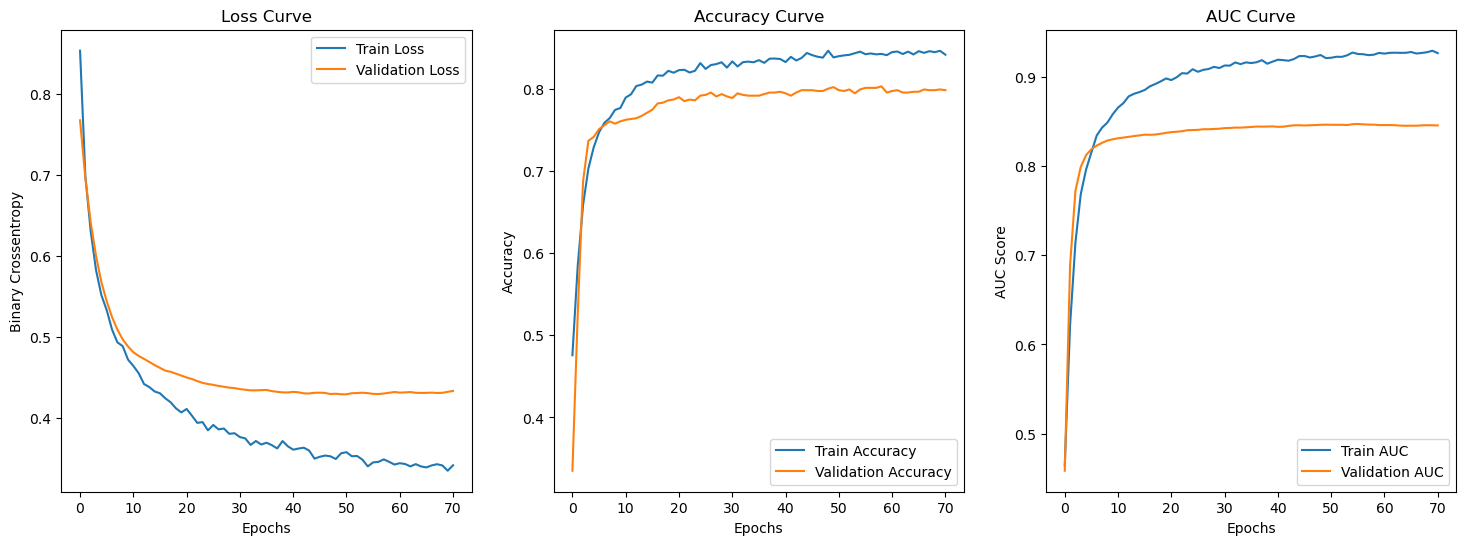

In [30]:
plot_history(history)

In [41]:
best_model_2 = keras.models.load_model('best_churn_model_2_2.h5')
test_results = best_model_2.evaluate(X_test, y_test, verbose=0)


test_loss     = test_results[0]
test_auc      = test_results[1]
test_accuracy = test_results[2]
test_precision = test_results[3]
test_recall    = test_results[4]

print(f"Test Loss: {test_loss:.4f}")
print(f"Test AUC: {test_auc:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, (model.predict(X_test) >= 0.44).astype(int)))

train_accuracy = history.history['accuracy'][-1]
val_accuracy   = history.history['val_accuracy']
train_loss     = history.history['loss']
val_loss       = history.history['val_loss']
train_auc= roc_auc_score(y_train, best_model_2.predict(X_train))

train_precision = history.history['precision'][-1]
train_recall = history.history['recall'][-1]

print(" Training Accuracy:", train_accuracy)
print(" Validation Accuracy:", val_accuracy[-1])
print(" Training Loss:", train_loss[-1])
print(" Validation Loss:", val_loss[-1])
print(" Train AUC:", train_auc)
print(" Train Precision:", train_precision)
print(" Train Recall:", train_recall)

Test Loss: 0.4203
Test AUC: 0.7956
Test Accuracy: 0.8428
Test Precision: 0.6512
Test Recall: 0.4982

Classification Report:
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       776
           1       0.60      0.62      0.61       281

    accuracy                           0.79      1057
   macro avg       0.73      0.74      0.73      1057
weighted avg       0.79      0.79      0.79      1057

227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
 Training Accuracy: 0.8415240049362183
 Validation Accuracy: 0.7982954382896423
 Training Loss: 0.3417610228061676
 Validation Loss: 0.4334210455417633
 Train AUC: 0.9391711596809607
 Train Precision: 0.8595930337905884
 Train Recall: 0.8163997530937195


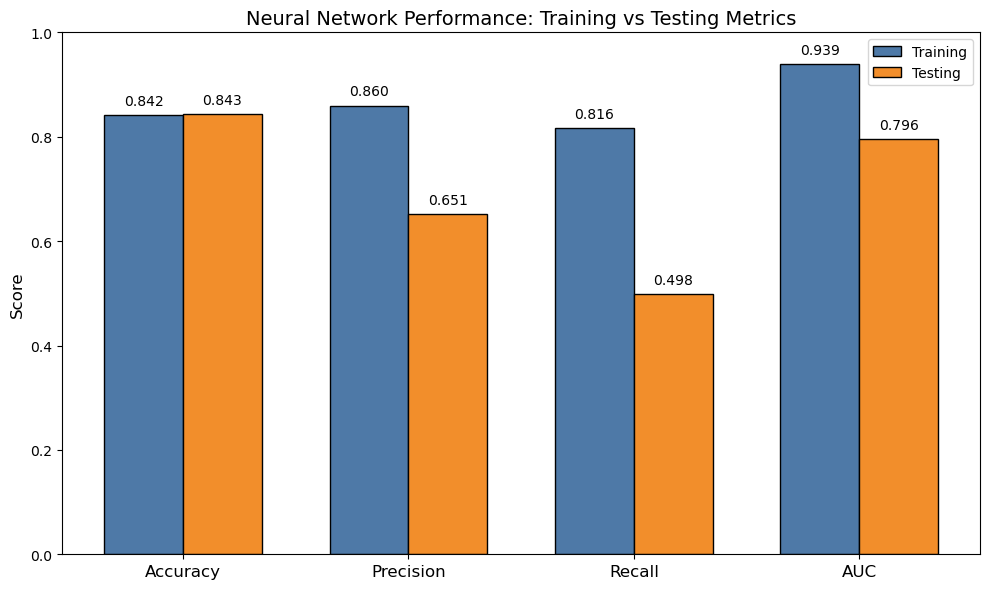

In [42]:
import numpy as np
import matplotlib.pyplot as plt

 
metrics = ['Accuracy', 'Precision', 'Recall', 'AUC']

train_values = [train_accuracy, train_precision, train_recall, train_auc]
test_values  = [test_accuracy, test_precision, test_recall, test_auc]

 
x = np.arange(len(metrics))
width = 0.35

 
plt.figure(figsize=(10,6))

plt.bar(x - width/2, train_values, width,
        label='Training', color='#4E79A7', edgecolor='black')     # navy blue

plt.bar(x + width/2, test_values, width,
        label='Testing', color='#F28E2B', edgecolor='black')      # orange

# --- Labels ---
plt.xticks(x, metrics, fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Neural Network Performance: Training vs Testing Metrics", fontsize=14)
plt.ylim(0, 1)
plt.legend()

# --- Display values on bars ---
for i, v in enumerate(train_values):
    plt.text(i - width/2, v + 0.02, f"{v:.3f}", ha='center')

for i, v in enumerate(test_values):
    plt.text(i + width/2, v + 0.02, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.show()

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<Axes: >

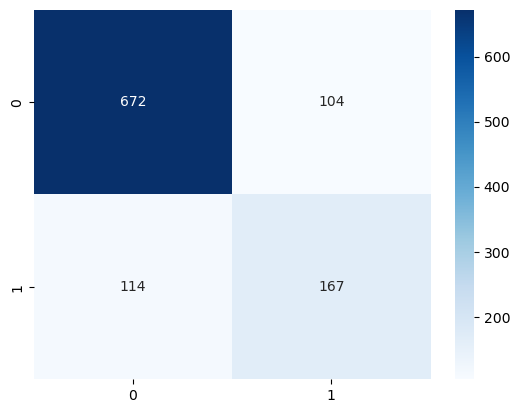

In [38]:
cm=confusion_matrix(y_test, (best_model_2.predict(X_test) >= 0.45).astype(int))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


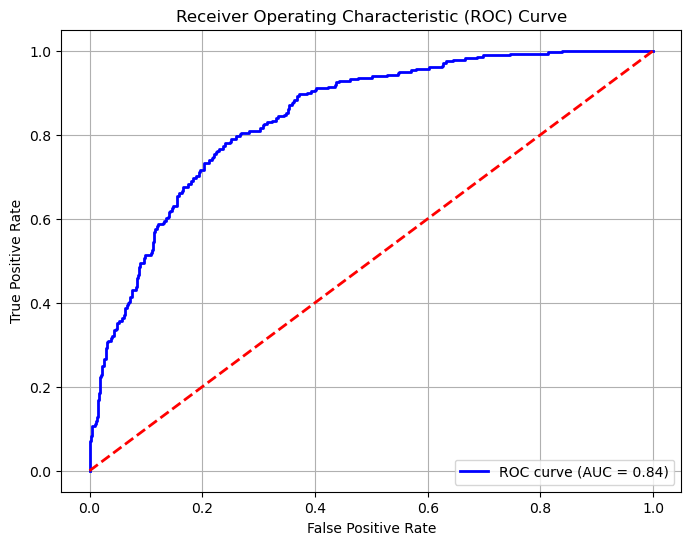

In [33]:
y_pred_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)


plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()